In [44]:

import pandas as pd
train= pd.read_csv("train.csv")

In [45]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


##**PREPROCESSING THE DATA**


In [47]:
import sklearn
import os
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/manish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
STOPWORDS = set(stopwords.words('english'))
def preprocess(data):

   #CREATING A SET OF STOPWORDS
    stopwords_english = set(stopwords.words('english'))

    cleaneddata = []
    for text in data:

        #LOWER CASE
        text = text.lower()

        #REMOVING LINKS
        text = re.sub(r'https?://[^\s\n\r]+', '', text)

        #REMOVING PUNCTUATION
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        #REMOVING WORDS CONTAINING NUMBERS
        text = re.sub(r'\w*\d\w*', '', text)

       #TOKENIZING AND REMOVING STOPWORDS
        words = text.split()
        words = [word for word in words if word not in stopwords_english]

        cleaneddata.append(' '.join(words))
    return cleaneddata

In [6]:
pptrain_comments = preprocess(train['comment_text'])

In [7]:
pptrain_comments

['explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired',
 'daww matches background colour im seemingly stuck thanks talk january utc',
 'hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport',
 'sir hero chance remember page thats',
 'congratulations well use tools well · talk',
 'cocksucker piss around work',
 'vandalism matt shirvington article reverted please dont banned',
 'sorry word nonsense offen

##FEATURE EXTRACTION

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer= TfidfVectorizer(max_features=1000, stop_words='english')

In [10]:
x_trainvectorized= vectorizer.fit_transform(pptrain_comments)


In [11]:
x=x_trainvectorized

In [12]:
y= train[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]

##TRAIN-TEST SPLIT FOR DATA PREPARATION

In [13]:
from sklearn.model_selection import train_test_split

In [14]:

#SPLITTING THE TRTAINING DATASET INTO TRAINING AND VALIDATION SET
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'x train shape: {x_train.shape}, y train shape: {y_train.shape}')
print(f'x validation shape: {x_test.shape}, y validation shape: {y_test.shape}')


x train shape: (127656, 1000), y train shape: (127656, 6)
x validation shape: (31915, 1000), y validation shape: (31915, 6)


##MODEL TRAINING

# NAIVE BAYES CLASSIFIER

In [15]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

In [16]:
classifier = MultinomialNB()
multi_clf = MultiOutputClassifier(classifier)

In [17]:
multi_clf.fit(x_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

#Performance Evaluation on Naive Bayes


In [18]:
# Calculate accuracy
y_pred = multi_clf.predict(x_test)
y_test = np.array(y_test)
acc = np.sum((y_pred == y_test).astype(int)) / y_pred.size
print(f"accuracy: {float(acc):.2f}")

accuracy: 0.98


In [19]:
from sklearn.metrics import precision_recall_fscore_support


# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1_score))

Precision: 0.8737
Recall: 0.4340
F1-Score: 0.5768


In [20]:
from sklearn.model_selection import cross_val_score
import random
import numpy as np
np.random.seed(42)
random.seed(32)

scores = cross_val_score(multi_clf, x, y, cv=5, scoring="f1_macro")
print(f' Naive Bayes f1 score:', scores)
print(f' Mean f1 score for Naive Bayes:',scores.mean())

 Naive Bayes f1 score: [0.40626156 0.40971596 0.4152695  0.41759386 0.41105161]
 Mean f1 score for Naive Bayes: 0.4119784950391997


#LOGISTIC REGRESSION CLASSIFICATION

In [21]:
# Train classifier on the training split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#logreg_clf = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)

logreg_clf = LogisticRegression(max_iter=1000)
logreg_clf = OneVsRestClassifier(logreg_clf)


#y_train = y_train.values.argmax(axis=1)
logreg_clf = logreg_clf.fit(x_train, y_train)

In [22]:
y_pred_log = logreg_clf.predict(x_test)
y_test= np.array(y_test)

In [23]:
y_pred_log

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [24]:
y_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

#Performance evaluation on logistic regression

In [25]:
from sklearn.metrics import accuracy_score

# Flatten y_test to make it compatible with y_pred
#y_pred_log = y_pred_log.argmax(axis=1)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9160


In [26]:
from sklearn.metrics import precision_recall_fscore_support


# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_log, average='weighted',zero_division=1)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1_score))

Precision: 0.8534
Recall: 0.5172
F1-Score: 0.6391


##CROSS VALIDATION


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import numpy as np



logreg_clf=LogisticRegression()
logreg_clf = OneVsRestClassifier(logreg_clf)

#y=np.argmax(y.values,axis=1)

# Perform cross-validation
scores_logreg = cross_val_score(logreg_clf, x, y, cv=5, scoring="f1_macro")

# Print the scores
print("\nLogistic Regression F1 scores:", scores_logreg)
print("Mean F1 score for Logistic Regression:", scores_logreg.mean())

/Users/manish/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/manish/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-


Logistic Regression F1 scores: [0.46182173 0.46726442 0.46061073 0.49235578 0.48250859]
Mean F1 score for Logistic Regression: 0.47291224962382816


#Naive Bayes f1 score: [0.40626156 0.40971596 0.4152695  0.41759386 0.41105161]

Mean f1 score for Naive Bayes:
0.4119784950391997

Logistic Regression F1 scores: [0.46182173 0.46726442 0.46061073 0.49231088 0.48250859]

Mean F1 score for Logistic Regression: 0.47290326952627276


##THIS MEANS THAT LOGISTIC REGRESSION PERFORMS SLIGHTLY BETTER THAN NAIVE BAYES CLASSIFIER

##GRID SEARCH CV FOR MODEL SELECTION

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create a logistic regression object
logreg_clf = LogisticRegression(max_iter=1000)

logreg_clf = OneVsRestClassifier(logreg_clf)

# Define the parameter grid
param_grid = {
    "estimator__C": [0.1, 0.5, 1.0, 2.0,],
    "estimator__penalty": [ 'l2'],
}

# Perform GridSearchCV
grid_search = GridSearchCV(logreg_clf, param_grid, scoring="f1_macro", cv=5)
grid_search.fit(x_train, y_train)


import sys
# save all GridSearchCV results
print("grid_search.best_params_: ", file=sys.stdout)
print(grid_search.best_params_, file=sys.stdout)
print("grid_search.best_score_: ", file=sys.stdout)
print(grid_search.best_score_, file=sys.stdout)
# Print the best parameters and the best score
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)





grid_search.best_params_: 
{'estimator__C': 2.0, 'estimator__penalty': 'l2'}
grid_search.best_score_: 
0.4833254904484776


In [29]:
best_model = grid_search.best_estimator_
logreg_clf = best_model.fit(x_train, y_train)

#TEST DATASET

In [30]:
testdataset= pd.read_csv("test.csv")

In [31]:
testdataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [32]:
pptest_comments= preprocess(testdataset["comment_text"]) #PREPROCESSING TEST DATASET

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(max_features=1000, stop_words='english')


In [34]:
vectorizer.fit(pptest_comments)
pptest_comments= vectorizer.transform(pptest_comments)


In [35]:
#MAKING PREDICTIONS ON THE TEST DATASET
y_pred_test = best_model.predict_proba(pptest_comments)

# Display the predictions
print(" Probability Predictions for the test dataset:")
print(y_pred_test)


 Probability Predictions for the test dataset:
[[0.01751817 0.00237908 0.00997018 0.00065537 0.00492418 0.00183632]
 [0.02116097 0.00275505 0.01014202 0.00251363 0.00673466 0.00152001]
 [0.02487368 0.00201781 0.01282432 0.00062005 0.01346455 0.00303986]
 ...
 [0.03596239 0.00435398 0.02820153 0.00185192 0.04262252 0.0053641 ]
 [0.01289482 0.00107765 0.00586469 0.00052595 0.0060165  0.00186549]
 [0.01546732 0.00207425 0.00558342 0.00026619 0.00613008 0.00464332]]


##SAMPLE SUBMISSIONS

In [36]:
sample_submissions=pd.read_csv("sample_submission.csv")

In [38]:


for i in range(len(sample_submissions)):
    for j in range(1, 7):  # Assuming there are 6 classes
        sample_submissions.loc[i, f"Class_{j}"] = y_pred_test[i][j-1] 


In [39]:
sample_submissions

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5,0.017518,0.002379,0.009970,0.000655,0.004924,0.001836
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5,0.021161,0.002755,0.010142,0.002514,0.006735,0.001520
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5,0.024874,0.002018,0.012824,0.000620,0.013465,0.003040
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5,0.019787,0.006392,0.019767,0.004733,0.009458,0.005038
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5,0.351896,0.008198,0.104495,0.001247,0.059121,0.005339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5,0.077724,0.004735,0.013756,0.001033,0.017239,0.004215
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5,0.030923,0.005970,0.025521,0.001009,0.031821,0.004103
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5,0.035962,0.004354,0.028202,0.001852,0.042623,0.005364
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5,0.012895,0.001078,0.005865,0.000526,0.006017,0.001865


In [40]:
sample_submissions.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5,0.017518,0.002379,0.009970,0.000655,0.004924,0.001836
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5,0.021161,0.002755,0.010142,0.002514,0.006735,0.001520
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5,0.024874,0.002018,0.012824,0.000620,0.013465,0.003040
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5,0.019787,0.006392,0.019767,0.004733,0.009458,0.005038
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5,0.351896,0.008198,0.104495,0.001247,0.059121,0.005339


In [41]:
labels= {
    "Class_1": "prob_toxic",
    "Class_2": "prob_severe_toxic",
    "Class_3":"prob_obscene",
    "Class_4":"prob_threat",
    "Class_5":"prob_insult",
    "Class_6":"prob_identity_hate"
}

sample_submissions=sample_submissions.rename(columns=labels)
sample_submissions

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,prob_toxic,prob_severe_toxic,prob_obscene,prob_threat,prob_insult,prob_identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5,0.017518,0.002379,0.009970,0.000655,0.004924,0.001836
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5,0.021161,0.002755,0.010142,0.002514,0.006735,0.001520
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5,0.024874,0.002018,0.012824,0.000620,0.013465,0.003040
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5,0.019787,0.006392,0.019767,0.004733,0.009458,0.005038
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5,0.351896,0.008198,0.104495,0.001247,0.059121,0.005339
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5,0.077724,0.004735,0.013756,0.001033,0.017239,0.004215
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5,0.030923,0.005970,0.025521,0.001009,0.031821,0.004103
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5,0.035962,0.004354,0.028202,0.001852,0.042623,0.005364
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5,0.012895,0.001078,0.005865,0.000526,0.006017,0.001865


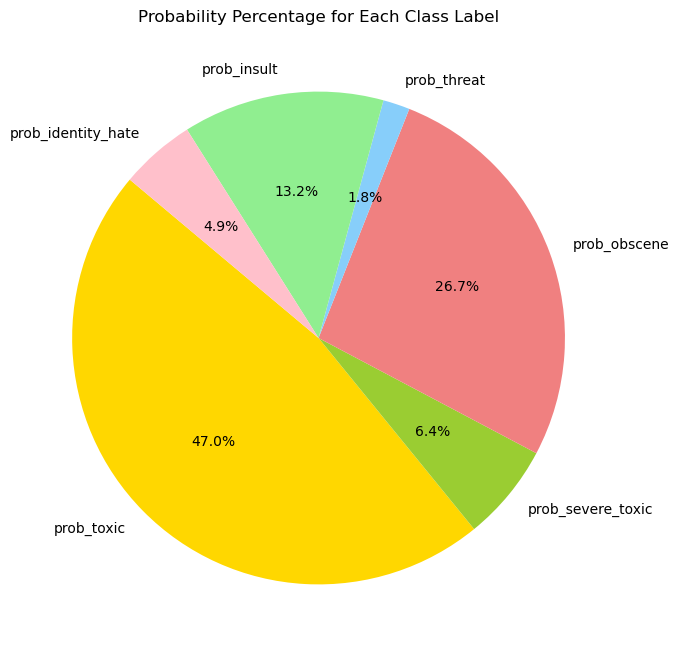

In [43]:
import matplotlib.pyplot as plt

probabilities = sample_submissions[['prob_toxic','prob_severe_toxic' , 'prob_obscene', 'prob_threat','prob_insult','prob_identity_hate']]

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
plt.figure(figsize=(8,8))
plt.pie(probabilities.iloc[0], labels=probabilities.columns, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Probability Percentage for Each Class Label')
plt.show()
